In [1]:
import networkx as nx

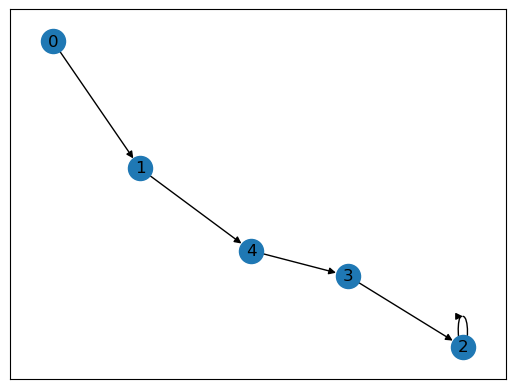

In [109]:
# Using random directed graph
g = nx.directed_configuration_model([0,1,2,1,1],[1,1,1,1,1])
nx.draw_networkx(g)

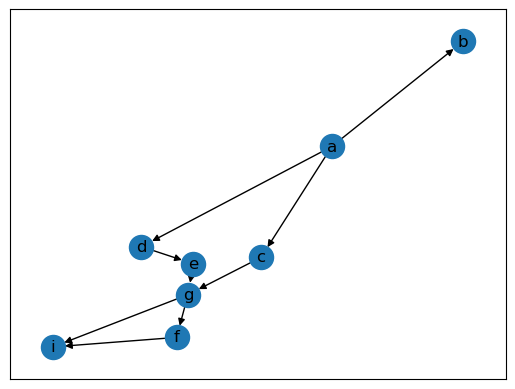

In [75]:
h = nx.DiGraph()

e = [('a','b',2),('a','c',1),('d','e',3),('c','g',2),('a','d',1),('g','f',4),('e','g',2),('f','i',1),('g','i',3)]
h.add_weighted_edges_from(e)
nx.draw_networkx(h)

In [ ]:
# using remove, in_degree

In [63]:
dict(h.out_degree).keys()


dict_keys(['a', 'b', 'c', 'd', 'e', 'g', 'f', 'i'])

L ← Empty list that will contain the sorted elements

S ← Set of all nodes with no incoming edge

while S is not empty do

    remove a node n from S

    add n to L

    for each node m with an edge e from n to m do

        remove edge e from the graph

        if m has no other incoming edges then

            insert m into S

if graph has edges then

    return error   (graph has at least one cycle)

else
  
    return L   (a topologically sorted order)

In [110]:


def kahn(h):
    sorted_list = []
    h1 = h.copy()

    # make a list that contains all the in_degree_zero nodes
    in_zero_list = [node for node in h1.nodes if h1.in_degree(node) == 0]

    # while the above list has array
    while len(in_zero_list) != 0:

        # add a node to the list, remove it from the graph, and zero list
        sorted_list.append(in_zero_list[0])
        h1.remove_node(in_zero_list[0])
        in_zero_list.remove(in_zero_list[0])

        # add new zero nodes to the zero list
        for node in h1.nodes:
            if h1.in_degree(node) == 0 and node not in in_zero_list:
                in_zero_list.append(node)
    
    # id graph contains any node return error
    if len(h1.nodes) !=0:
        print('graph has at least one cycle')
        print(sorted_list)
    # else return the list
    else:
        print(sorted_list)


kahn(g)


graph has at least one cycle
[0, 1, 4, 3]


# BFS


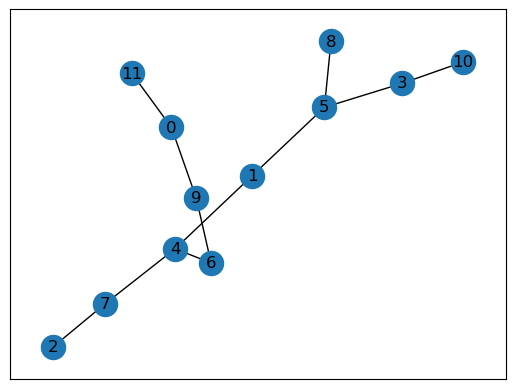

In [35]:
# make a random tree

g = nx.random_tree(12)
nx.draw_networkx(g)

In [44]:
def find_path(path_dic, start, end):

    current_node = end
    path_list = [end]

    # append all the nodes from the end node to the start node to a list
    while current_node != start:
        path_list.append(path_dic[current_node])
        current_node = path_dic[current_node]
    
    # reverse the list 
    path_list.reverse()
    
    return path_list


In [47]:
# start the algorithm 

def bfs(g, start, end):

    # make a copy of the graph
    g1 = g.copy()
    node_list = list(g1.nodes)

    # make a queue and a trend list to keep the trach of nodes
    queue = [start]
    trend = [start]
    node_list.remove(start)
    path_dic = {}

    # iterate until the queue list becomes empty
    while len(queue) != 0:

        # for each neighbour of the current node itterate
        for node in g1[queue[0]]:

            # add it to the tend list and path dict if it is not added before
            if node not in queue:
                trend.append(node)
                queue.append(node)
                path_dic[node] = queue[0]
                node_list.remove(node)

        # remove the current node from the graph and the queue
        g1.remove_node(queue[0])
        queue.pop(0)

     # check whether this graph is a tree
    if len(node_list) !=0:
        return print('this graph is not a tree')
    
    # use find_ path function to extract the path between start to end
    path = find_path(path_dic, start, end)
    return trend, path
 



In [48]:

start = 8
end = 10
trend, path = bfs(g, start, end)
print(f'trend = {trend} \npath from {start} to {end} = {path}')

trend = [8, 5, 1, 3, 4, 10, 7, 6, 2, 9, 0, 11] 
path from 8 to 10 = [8, 5, 3, 10]
